In [1]:
# import necessary modules
# uncomment to get plots displayed in notebook
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy import Class

## Fixed parameters

In [2]:
#####################################################
#
# Cosmological parameters, which I fixed
#
#####################################################

# temperature of CMB
T_cmb = 2.726  # [K]

# default value of Neff
Neff_def = 3.044  # [dimensionless]

#####################################################
#
# Axion parameters, which I fixed
#
#####################################################

# mass of axion
m_ncdm_in_eV = 1e-8  # [eV]

# temperature of axion, nowadays
# T_ncdm = 0.331070  # [T_CMB]
T_ncdm = 0.731070  # [T_CMB]
T_ncdm_K = T_ncdm * T_cmb  # [K]

In [3]:
#####################################################
#
# Cosmological parameters and other CLASS parameters
#
#####################################################
common_settings = {# LambdaCDM parameters
                   'h':0.67810,
                   'omega_b':0.02238280,
                   'omega_cdm': 0.1201075,
                   # Take fixed value for primordial Helium (instead of automatic BBN adjustment)
                   'YHe':0.2454,
                   # Background parameters
                   'T_cmb': T_cmb,
                   # Axion parameters
                   'N_ncdm': 1,
                   'm_ncdm': m_ncdm_in_eV,
                   'T_ncdm': T_ncdm
                   }

## Running Class

In [4]:
############################################
#
# Varying parameter (others fixed to default)
# The varying parameter will be:
# Omega_ncdm
#
############################################

# Omega_ncdm
arr_Omega_ncdm = np.logspace(-9, -5, 100)
# print("arr_Omega_ncdm:", arr_Omega_ncdm)

# loop over varying parameter values

AxionClass = {}
baAxionClass = {}

for i in range(0, len(arr_Omega_ncdm)):
    Omega_ncdm = arr_Omega_ncdm[i]

    AxionClass[i] = Class()
    AxionClass[i].set(common_settings)
    # M.set({'m_ncdm':arr_Mncdm_eV[0]})
    AxionClass[i].set({'Omega_ncdm':Omega_ncdm})
    AxionClass[i].compute()
    # load background table
    baAxionClass[i] = AxionClass[i].get_background()
    
    if i % 10 == 0:
        print("I'm in step:", i)

I'm in step: 0
I'm in step: 10
I'm in step: 20
I'm in step: 30
I'm in step: 40
I'm in step: 50
I'm in step: 60
I'm in step: 70
I'm in step: 80
I'm in step: 90


## Collect data from CLASS

In [7]:
####################################################
#
# Calculating and colleting the delta_Neff in two
# different ways.
#
####################################################

# the dictionary, which will contain all of the necessary data
data_map = {}
data_map['Omega_ncdm'] = arr_Omega_ncdm

# --- Collect the delta_Neff from the CLASS
arr_delta_Neff = np.array([])

for i in range(0, len(arr_Omega_ncdm)):
    # find value of Neff from CLASS
    Neff = AxionClass[i].get_current_derived_parameters(['Neff'])['Neff']
    # compute delta_Neff
    delta_Neff = Neff - Neff_def
    # append
    arr_delta_Neff = np.append(arr_delta_Neff, delta_Neff)

data_map['delta_Neff_CLASS'] = arr_delta_Neff

# --- Collect the delta_Neff from ANALITICAL (function)
arr_delta_Neff = np.array([])

def cal_delta_Neff(_Omega_a, _rho_crit, _rho_gamma):
    """
    """
    return 8/7 * (11/4)**(4/3) * (_Omega_a * _rho_crit) / _rho_gamma

for i in range(0, len(arr_Omega_ncdm)):
    # find and take fixed values
    Omega_a = arr_Omega_ncdm[i]
    
#     rho_crit = baAxionClass[i]['(.)rho_crit'][-1]
    rho_crit = baAxionClass[0]['(.)rho_crit'][-1]

#     rho_gamma = baAxionClass[i]['(.)rho_g'][-1]
    rho_gamma = baAxionClass[0]['(.)rho_g'][-1]

    # calculate delta_Neff
    delta_Neff = cal_delta_Neff(Omega_a, rho_crit, rho_gamma)
    # append
    arr_delta_Neff = np.append(arr_delta_Neff, delta_Neff)

data_map['delta_Neff_ANAL'] = arr_delta_Neff

## Plotting: $\Delta N_{\mathrm{eff}}$

In [13]:
font = {'size'   : 14, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
# matplotlib.mathtext.rcParams['legend.fontsize']='medium'

Text(0, 0.5, '$\\Delta N_{\\mathrm{eff}}$')

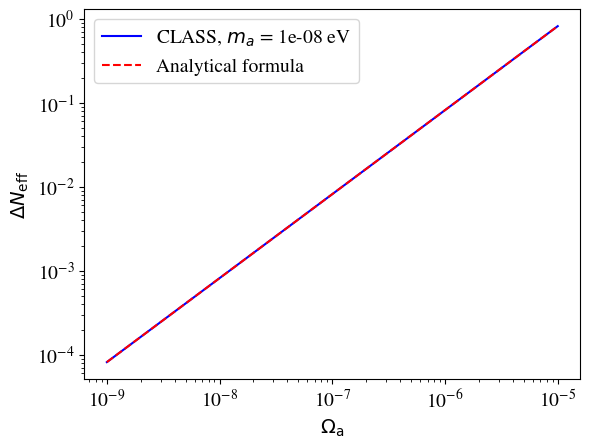

In [14]:
plt.loglog(data_map['Omega_ncdm'],data_map['delta_Neff_CLASS'],'b-', 
           label=f'CLASS, $m_{{a}}$ = {m_ncdm_in_eV} eV')
plt.loglog(data_map['Omega_ncdm'],data_map['delta_Neff_ANAL'],'r--', 
           label='Analytical formula')

# legend
plt.legend(loc='upper left')
# Describtion
plt.xlabel(r"$\Omega_{\mathrm{a}}$")
plt.ylabel(r"$\Delta N_{\mathrm{eff}}$")
# plt.tight_layout()

## Plotting: $\Delta N_{\mathrm{eff}}^{\mathrm{CLA}} - \Delta N_{\mathrm{eff}}^{\mathrm{ANA}}$

Text(0.5, 1.0, 'Differences between two appraches')

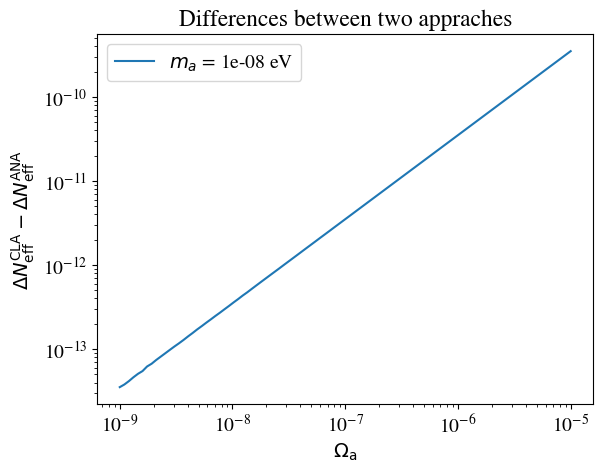

In [15]:
plt.loglog(data_map['Omega_ncdm'],-data_map['delta_Neff_CLASS'] + data_map['delta_Neff_ANAL'], 
           label=f'$m_{{a}}$ = {m_ncdm_in_eV} eV')


# legend
plt.legend(loc='upper left')
# Describtion
plt.xlabel(r"$\Omega_{\mathrm{a}}$")
plt.ylabel(r"$\Delta N_{\mathrm{eff}}^{\mathrm{CLA}} - \Delta N_{\mathrm{eff}}^{\mathrm{ANA}}$")
plt.title("Differences between two appraches")
# plt.tight_layout()